# xENSO


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr

from xenso import indices


In [3]:
ersstv5 = (
    xr.open_dataset(
        "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/dods",
        decode_cf=False,
    )
    .rename(X="lon", Y="lat", T="time")
    .squeeze(drop=True)
).load()
ersstv5


<xarray.Dataset>
Dimensions:  (lon: 180, time: 2027, lat: 89)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) float32 -1.272e+03 -1.27e+03 -1.27e+03 ... 752.5 753.5 754.5
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
Data variables:
    sst      (time, lat, lon) float32 -999.0 -999.0 -999.0 ... -1.8 -1.8 -1.8
Attributes:
    Conventions:  IRIDL

In [4]:
ersstv5.time.attrs["calendar"] = "360_day"
ersstv5 = xr.decode_cf(ersstv5).sst
ersstv5 = ersstv5.where(ersstv5 != -999).convert_calendar("standard", align_on="date")
ersstv5


<xarray.DataArray 'sst' (time: 2027, lat: 89, lon: 180)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
...
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-16 1854-02-16 ... 2022-11-16
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
Attributes:
    pointwidth:          1.0
    long_name:           Extended reconstructed sea surface temperature
    valid_max:           45.0
    valid_min:           -3.0
    units:               Celsius_scale
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature
    standard_name:       sea_surface_temperature
    expires:             1672617600

In [5]:
ecindex = indices.ECindex(ersstv5, base_period=("1991-01-01", "2020-12-01"))
ecindex

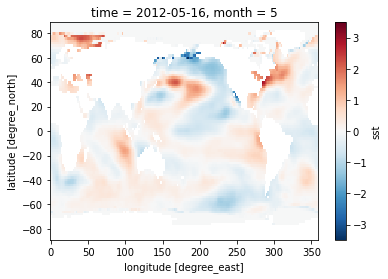

In [6]:
ecindex.sst_data[1900].plot()

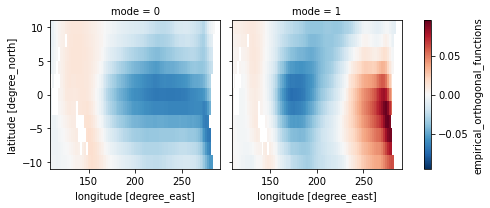

In [7]:
ecindex.solver.eofs(neofs=2).plot(col="mode",col_wrap=2)

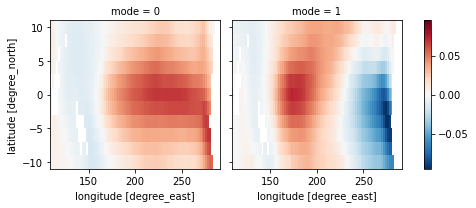

In [8]:
ecindex.eofs.plot(col="mode",col_wrap=2)

In [9]:
patterns = ecindex.patterns
patterns

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Data variables:
    E_pattern  (lat, lon) float64 nan nan nan ... -0.0002238 -0.0002247
    C_pattern  (lat, lon) float64 nan nan nan ... -0.0005514 -0.0006133
Attributes:
    description:  E and C regression patterns

ERROR 1: PROJ: proj_create_from_database: Open of /home/dangomelon/anaconda3/envs/pangeo/share/proj failed


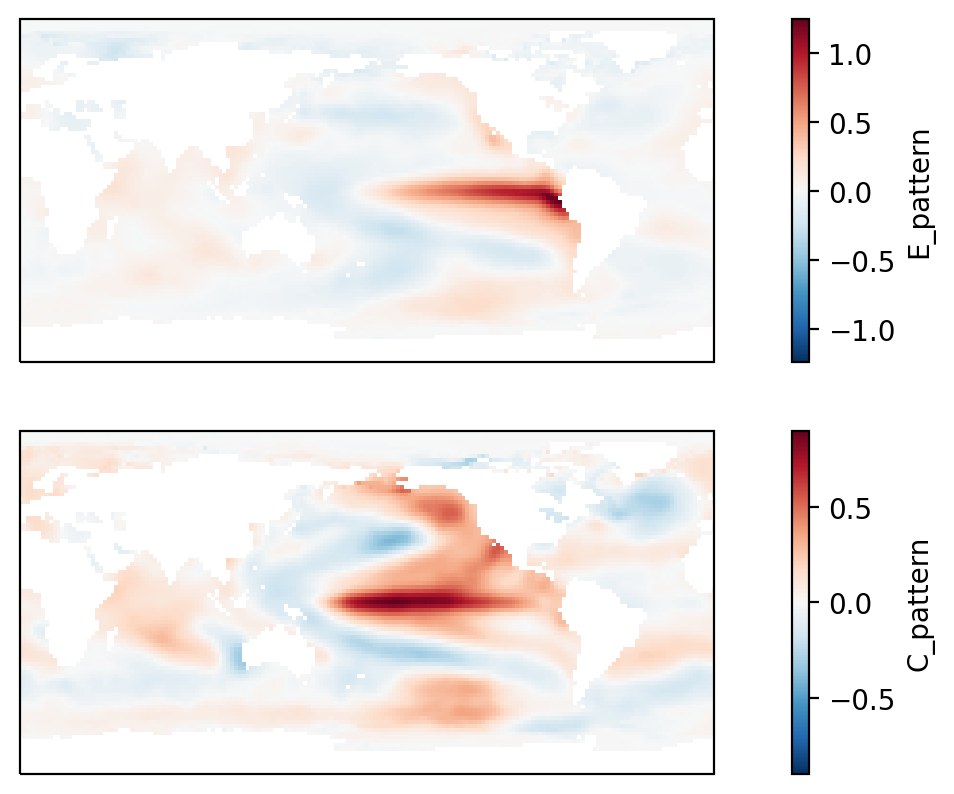

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as crrs

fig, ax = plt.subplots(nrows=2, figsize=(10, 5), dpi=200, subplot_kw={"projection": crrs.PlateCarree(central_longitude=180)})
patterns.E_pattern.plot(ax=ax[0], transform=crrs.PlateCarree())
patterns.C_pattern.plot(ax=ax[1], transform=crrs.PlateCarree())


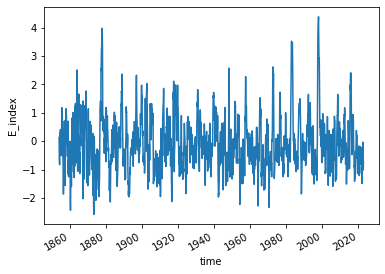

In [11]:
ecindex.ecindex.E_index.plot()

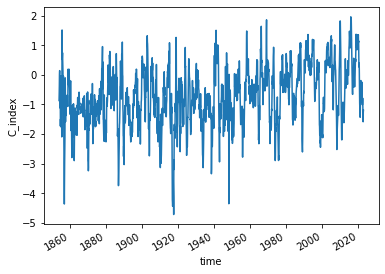

In [12]:
ecindex.ecindex.C_index.plot()